In [16]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pylab as plt
plt.style.use('ggplot')
import joblib
import glob

import SNclass
reload(SNclass);

In [2]:
N = 300
for n,f in enumerate(sorted(glob.glob('SIMGEN_PUBLIC_DES/DES_*.DAT.gz'))[:N]):
    obs, metadata = SNclass.SNPhotCC_Parser(f)
    #print n, snid, sn_type, sim_type, sim_z, obs.shape
    if n == 130:  # stop at a nice big lightcurve
    #if n == 0:
        break

print f
obs.head()

SIMGEN_PUBLIC_DES/DES_SN005754.DAT.gz


,MJD,FLT,FLUXCAL,FLUXCALERR,SNR,MAG,MAGERR,SIM_MAG
0,56207.156,g,1.262,2.280,0.55,99.0,5.0,99.0
1,56207.172,r,1.830,1.603,1.14,99.0,5.0,99.0
2,56209.191,i,1.739,2.140,0.81,99.0,5.0,99.0
3,56209.215,z,1.936,2.200,0.88,99.0,5.0,99.0
4,56215.164,g,-1.567,1.595,-0.98,99.0,5.0,99.0


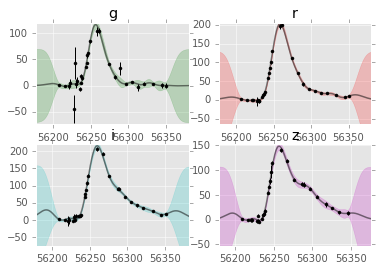

In [17]:
#reload(SNclass)
snc = SNclass.SNclass('SIMGEN_PUBLIC_DES/DES_SN005754.DAT.gz')
snc.plot()

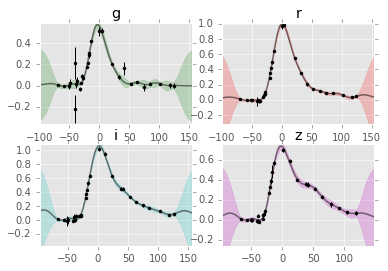

In [18]:
snc.plot(normalized=True)

In [5]:
#reload(SNclass)
%timeit SNclass.SNPhotCC_Parser('SIMGEN_PUBLIC_DES/DES_SN005754.DAT.gz')

100 loops, best of 3: 3.9 ms per loop


In [6]:
#reload(SNclass)
%timeit SNclass.SNPhot_fitter(obs)

10 loops, best of 3: 50.8 ms per loop


In [7]:
#reload(SNclass)
%timeit SNclass.SNclass('SIMGEN_PUBLIC_DES/DES_SN005754.DAT.gz')

10 loops, best of 3: 117 ms per loop


In [8]:
import cPickle
tmp = cPickle.dumps(snc)  # approximate size of objects
len(tmp) * 30000 / 1024 / 1024   # what if we were to read them all in and fit them all? (in megabytes)

7340

Note I had to update the code to get it to not fail on any of the first 300 lightcurves: changed
```
kernel = np.var(y) * kernels.ExpSquaredKernel(100.)
```
to
```
kernel = 5. * np.var(y) * kernels.ExpSquaredKernel(100.)
```
I had to add some try/catch statements and up the value from 5 to 10 to 25 if fail. This works on all but one of the first 30,000 lightcurves.

In [9]:
def progress(x, ind, every):
    if (ind % every) == 0:
        print ind, x
    return x

In [10]:
reload(SNclass)
N = 3000
lcdata = [SNclass.SNclass(progress(f, i, 300)) \
            for i,f in enumerate(sorted(glob.glob('SIMGEN_PUBLIC_DES/DES_*.DAT.gz'))[:N])]

0 SIMGEN_PUBLIC_DES/DES_SN000017.DAT.gz
300 SIMGEN_PUBLIC_DES/DES_SN012721.DAT.gz
600 SIMGEN_PUBLIC_DES/DES_SN026219.DAT.gz
900 SIMGEN_PUBLIC_DES/DES_SN038678.DAT.gz
1200 SIMGEN_PUBLIC_DES/DES_SN051308.DAT.gz
1500 SIMGEN_PUBLIC_DES/DES_SN065082.DAT.gz
1800 SIMGEN_PUBLIC_DES/DES_SN076844.DAT.gz
2100 SIMGEN_PUBLIC_DES/DES_SN088297.DAT.gz
2400 SIMGEN_PUBLIC_DES/DES_SN099946.DAT.gz
2700 SIMGEN_PUBLIC_DES/DES_SN110803.DAT.gz


II (0.8822, 0.0161) SIMGEN_PUBLIC_DES/DES_SN109810.DAT.gz


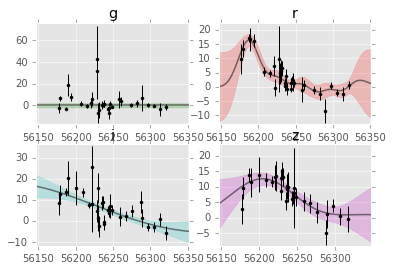

In [19]:
reload(SNclass)
f = 'SIMGEN_PUBLIC_DES/DES_SN109810.DAT.gz'
snc = SNclass.SNclass(f)
print snc.metadata['sim_type'], snc.metadata['hostz'], snc.metadata['filename']
snc.plot()

Add functions to normalize the LC's -- by flux (normalize vs. max in 'r') and time (first, subtract time of peak in 'r', then time-dilate)

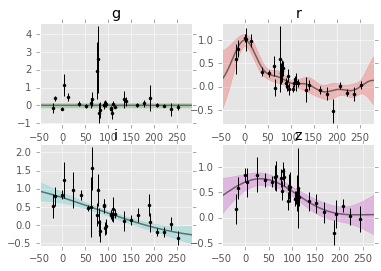

In [20]:
reload(SNclass)
snc = SNclass.SNclass(f)
snc.normalize()
snc.plot(normalized=True)